Project work on Network Intrusion Detection. The tools used in generating this injected dataset are; Sqlite, Zenmap Nmap, ID2T and Python.The ID2T toolkit targets the injection of attacks into existing network datasets. First, it analyzes a given dataset and collects statistics from it. These statistics are stored in a local database (Sqlite). Next, these statistics can be used to define attack parameters for the injection of one or multiple attacks. Finally, the application creates the required attack packets and injects them into the existing file. Resulting in a new PCAP with the injected attacks and a label file indicating the position (timestamps) of the first and last attack packet.
Nping is a multifunctional tool, perfect for generating RAW packages. It has an "echo mode" that enables advanced detection and troubleshooting. Echo mode allows both the destination and source computers to see how network packets change during transmission.

Basically, this mode splits nping into its two components: echo server and echo client. An echo server is a network service for capturing packets and echoing them over a side channel to the originating client. The Echo client takes over generating packets and sending them to the server. This element is also responsible for receiving the echo version. I like echo mode because it perfectly understands the difference between sending and receiving packets.


In [3]:
## importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pycountry_convert as pc
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import xgboost
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline

In [5]:
#Reading the loaded files
data_1=pd.read_csv('network_dataset_1.csv')
data_2=pd.read_csv('network_dataset_2.csv')
data_3=pd.read_csv('network_dataset_3.csv')
data_4=pd.read_csv('network_dataset_4.csv')
data_5=pd.read_csv('network_dataset_5.csv')
data_6=pd.read_excel('network_dataset_6.xlsx')

In [6]:
#joining all 6 files to become one
data=pd.concat([data_1,data_2,data_3,data_4,data_5,data_6],axis=0)
data.shape

(94200, 30)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94200 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Source IP                       94200 non-null  object
 1   Destination IP                  94200 non-null  object
 2   Source Port                     94200 non-null  int64 
 3   Destination Port                94200 non-null  int64 
 4   Protocol                        94200 non-null  object
 5   Packet Size                     94200 non-null  int64 
 6   Timestamp                       94200 non-null  object
 7   pktsSent                        94200 non-null  int64 
 8   kbytesSent                      94200 non-null  int64 
 9   kbytesReceived                  94200 non-null  int64 
 10  TTL (Time to Live) Value        94200 non-null  int64 
 11  Flag                            94200 non-null  object
 12  VLAN ID                         94200 non-null 

In [8]:
# to get columns with missing values
missing_values = data.isna().sum()
missing_columns = missing_values[missing_values > 1]

# print the columns with missing values
if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No columns have more than one missing value.")

No columns have more than one missing value.


In [9]:
data.duplicated().sum()

0

In [10]:
data.head()

,Source IP,Destination IP,Source Port,Destination Port,Protocol,Packet Size,Timestamp,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,Flag,VLAN ID,QoS (Quality of Service),AS (Autonomous System) Number,Geolocation,Application,Threat Score,Payload,Packet ID,Time to Live (TTL),Quality of Service (QoS) Class,Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Flow ID,Routing Information,Packet Capture Timestamp,Attack Type
0,105.89.111.120,125.39.118.75,28847,32584,TCP,1120,2023-04-26 03:26:18,376,1424,1994,110,FIN,7,Gold,1878,China,Web,8,Produce tell after.,890734,102,Silver,False,4,14,448,441b9440-05a5-403d-be93-f1034cbf6f6c,Shoulder knowledge.,2021-04-28 19:13:47,FTPWinaXe Exploit
1,67.162.41.35,96.65.28.109,4666,14817,TCP,481,2023-05-02 20:55:23,773,588,972,59,ACK,3,Gold,4672,Senegal,FTP,4,Yeah finally cost.,422424,58,Standard,True,0,10,529,585d069a-ecd3-4099-9e0b-28d882ec86aa,Quickly become.,2021-04-24 05:30:17,MemcrashedSpoofer Attack
2,21.12.248.67,221.80.136.139,44942,59301,UDP,152,2023-05-24 20:54:31,294,1834,1895,121,FIN,8,Platinum,4482,Moldova,FTP,7,Shake boy.,938442,19,Standard,True,1,13,463,538e98fa-d10e-4ce1-b6ac-d0a6a95e900f,Radio ball position.,2022-04-14 04:05:24,P2PBotnet
3,4.92.166.209,34.96.37.72,63574,4929,ICMP,144,2022-09-25 09:53:40,904,1507,694,36,ACK,1,Platinum,4519,American Samoa,Other,8,Republican thing.,295173,36,Standard,True,1,6,332,9a934ca3-b9d3-4383-b436-18a55742685f,Nation line college.,2021-04-11 11:30:46,SQLi Attack
4,42.96.78.99,8.99.218.138,4431,22529,TCP,860,2022-08-06 14:24:11,861,1330,867,84,ACK,3,Platinum,2326,Palestinian Territory,SSH,5,Billion focus.,713384,73,Standard,True,3,16,478,ab75963b-3b80-4a51-bf6e-a63b10fb6e5f,Member picture.,2021-11-08 16:32:08,Heart-bleed


In [11]:
data.describe(include='all')

,Source IP,Destination IP,Source Port,Destination Port,Protocol,Packet Size,Timestamp,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,Flag,VLAN ID,QoS (Quality of Service),AS (Autonomous System) Number,Geolocation,Application,Threat Score,Payload,Packet ID,Time to Live (TTL),Quality of Service (QoS) Class,Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Flow ID,Routing Information,Packet Capture Timestamp,Attack Type
count,94200,94200,94200.000000,94200.000000,94200,94200.000000,94200,94200.000000,94200.000000,94200.000000,94200.000000,94200,94200.000000,94200,94200.000000,94200,94200,94200.000000,94200,94200.000000,94200.000000,94200,94200,94200.000000,94200.000000,94200.000000,94200,94200,94200,94200
unique,94199,94200,NaN,NaN,3,NaN,92262,NaN,NaN,NaN,NaN,4,NaN,4,NaN,243,5,NaN,92244,NaN,NaN,3,2,NaN,NaN,NaN,94200,92219,93587,19
top,170.168.163.38,125.39.118.75,NaN,NaN,UDP,NaN,26/12/2022 09:32,NaN,NaN,NaN,NaN,SYN,NaN,Silver,NaN,Congo,FTP,NaN,Administration.,NaN,NaN,Standard,False,NaN,NaN,NaN,441b9440-05a5-403d-be93-f1034cbf6f6c,Responsibility.,10/07/2021 20:33,SMBLoris Attack
freq,2,1,NaN,NaN,31508,NaN,4,NaN,NaN,NaN,NaN,23627,NaN,23663,NaN,831,18996,NaN,70,NaN,NaN,31406,47139,NaN,NaN,NaN,1,64,3,5130
mean,NaN,NaN,32681.652739,32785.473312,NaN,779.501274,NaN,501.791072,1026.240743,1025.474501,64.434565,NaN,5.488408,NaN,5491.123312,NaN,NaN,5.507548,NaN,549356.684098,64.299650,NaN,NaN,3.512983,8.491168,399.587633,NaN,NaN,NaN,NaN
std,NaN,NaN,18954.108222,18914.681025,NaN,415.360703,NaN,287.883713,590.361131,590.371901,36.914171,NaN,2.882758,NaN,2600.795383,NaN,NaN,2.875271,NaN,259246.314797,37.085122,NaN,NaN,2.290633,4.601631,115.503851,NaN,NaN,NaN,NaN
min,NaN,NaN,2.000000,2.000000,NaN,64.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1000.000000,NaN,NaN,1.000000,NaN,100026.000000,1.000000,NaN,NaN,0.000000,1.000000,200.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,16205.000000,16417.000000,NaN,418.000000,NaN,253.000000,519.000000,515.000000,33.000000,NaN,3.000000,NaN,3235.000000,NaN,NaN,3.000000,NaN,324841.000000,32.000000,NaN,NaN,2.000000,5.000000,300.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,32651.000000,32751.500000,NaN,778.000000,NaN,501.500000,1026.000000,1028.000000,64.000000,NaN,5.000000,NaN,5480.500000,NaN,NaN,6.000000,NaN,549219.000000,64.000000,NaN,NaN,4.000000,8.000000,399.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,49135.250000,49189.000000,NaN,1139.000000,NaN,752.000000,1537.000000,1536.000000,96.000000,NaN,8.000000,NaN,7744.000000,NaN,NaN,8.000000,NaN,773011.750000,96.000000,NaN,NaN,6.000000,12.000000,500.000000,NaN,NaN,NaN,NaN


In [12]:
data.columns

Index(['Source IP', 'Destination IP', 'Source Port', 'Destination Port',
       'Protocol', 'Packet Size', 'Timestamp', 'pktsSent', 'kbytesSent',
       'kbytesReceived', 'TTL (Time to Live) Value', 'Flag', 'VLAN ID',
       'QoS (Quality of Service)', 'AS (Autonomous System) Number',
       'Geolocation', 'Application', 'Threat Score', 'Payload', 'Packet ID',
       'Time to Live (TTL)', 'Quality of Service (QoS) Class', 'Fragmentation',
       'Type of Service (ToS)', 'Hop Count', 'Error Codes', 'Flow ID',
       'Routing Information', 'Packet Capture Timestamp', 'Attack Type'],
      dtype='object')

In [13]:
#Dropping columns after feature selection
data.drop(['Source IP', 'Destination IP','Timestamp','Packet Capture Timestamp','Payload','Flow ID','Routing Information','Packet Capture Timestamp','Packet ID'], axis=1,inplace=True)

In [14]:
data.head()

,Source Port,Destination Port,Protocol,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,Flag,VLAN ID,QoS (Quality of Service),AS (Autonomous System) Number,Geolocation,Application,Threat Score,Time to Live (TTL),Quality of Service (QoS) Class,Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Attack Type
0,28847,32584,TCP,1120,376,1424,1994,110,FIN,7,Gold,1878,China,Web,8,102,Silver,False,4,14,448,FTPWinaXe Exploit
1,4666,14817,TCP,481,773,588,972,59,ACK,3,Gold,4672,Senegal,FTP,4,58,Standard,True,0,10,529,MemcrashedSpoofer Attack
2,44942,59301,UDP,152,294,1834,1895,121,FIN,8,Platinum,4482,Moldova,FTP,7,19,Standard,True,1,13,463,P2PBotnet
3,63574,4929,ICMP,144,904,1507,694,36,ACK,1,Platinum,4519,American Samoa,Other,8,36,Standard,True,1,6,332,SQLi Attack
4,4431,22529,TCP,860,861,1330,867,84,ACK,3,Platinum,2326,Palestinian Territory,SSH,5,73,Standard,True,3,16,478,Heart-bleed


In [15]:
#Attack is multi-class, we want to only deal with binary class, i.e, malicious or benign attack type
data['Attack Type'].value_counts()

SMBLoris Attack             5130
DoS                         5081
Infiltration                5055
MS17Scan Attack             5034
MemcrashedSpoofer Attack    5001
None                        4993
JoomlaRegPrivesc Exploit    4984
Heart-bleed                 4975
DDoS                        4972
P2PBotnet                   4963
Portscan Attack             4938
SQLi Attack                 4932
EternalBlue Exploit         4898
Sality Botnet               4897
SMBScan Attack              4894
FTPWinaXe Exploit           4878
Brute force                 4861
DDoS Attack                 4860
Web-based                   4854
Name: Attack Type, dtype: int64

In [16]:
data.describe()

,Source Port,Destination Port,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,VLAN ID,AS (Autonomous System) Number,Threat Score,Time to Live (TTL),Type of Service (ToS),Hop Count,Error Codes
count,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000
mean,32681.652739,32785.473312,779.501274,501.791072,1026.240743,1025.474501,64.434565,5.488408,5491.123312,5.507548,64.299650,3.512983,8.491168,399.587633
std,18954.108222,18914.681025,415.360703,287.883713,590.361131,590.371901,36.914171,2.882758,2600.795383,2.875271,37.085122,2.290633,4.601631,115.503851
min,2.000000,2.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000,1.000000,200.000000
25%,16205.000000,16417.000000,418.000000,253.000000,519.000000,515.000000,33.000000,3.000000,3235.000000,3.000000,32.000000,2.000000,5.000000,300.000000
50%,32651.000000,32751.500000,778.000000,501.500000,1026.000000,1028.000000,64.000000,5.000000,5480.500000,6.000000,64.000000,4.000000,8.000000,399.000000
75%,49135.250000,49189.000000,1139.000000,752.000000,1537.000000,1536.000000,96.000000,8.000000,7744.000000,8.000000,96.000000,6.000000,12.000000,500.000000
max,65535.000000,65535.000000,1500.000000,1000.000000,2048.000000,2048.000000,128.000000,10.000000,9999.000000,10.000000,128.000000,7.000000,16.000000,599.000000


In [17]:
data.dtypes

Source Port                        int64
Destination Port                   int64
Protocol                          object
Packet Size                        int64
pktsSent                           int64
kbytesSent                         int64
kbytesReceived                     int64
TTL (Time to Live) Value           int64
Flag                              object
VLAN ID                            int64
QoS (Quality of Service)          object
AS (Autonomous System) Number      int64
Geolocation                       object
Application                       object
Threat Score                       int64
Time to Live (TTL)                 int64
Quality of Service (QoS) Class    object
Fragmentation                       bool
Type of Service (ToS)              int64
Hop Count                          int64
Error Codes                        int64
Attack Type                       object
dtype: object

In [18]:
for cols in data.columns:
    if data[cols].dtypes == 'int64':
        print (cols)

Source Port
Destination Port
Packet Size
pktsSent
kbytesSent
kbytesReceived
TTL (Time to Live) Value
VLAN ID
AS (Autonomous System) Number
Threat Score
Time to Live (TTL)
Type of Service (ToS)
Hop Count
Error Codes


In [19]:
for cols in data.columns:
    if data[cols].dtypes == 'object':
        print (cols)

Protocol
Flag
QoS (Quality of Service)
Geolocation
Application
Quality of Service (QoS) Class
Attack Type


In [20]:
data['Attack Type'].value_counts()

SMBLoris Attack             5130
DoS                         5081
Infiltration                5055
MS17Scan Attack             5034
MemcrashedSpoofer Attack    5001
None                        4993
JoomlaRegPrivesc Exploit    4984
Heart-bleed                 4975
DDoS                        4972
P2PBotnet                   4963
Portscan Attack             4938
SQLi Attack                 4932
EternalBlue Exploit         4898
Sality Botnet               4897
SMBScan Attack              4894
FTPWinaXe Exploit           4878
Brute force                 4861
DDoS Attack                 4860
Web-based                   4854
Name: Attack Type, dtype: int64

Attack is multi-class, we want to only deal with binary class, i.e, malicious or benign attack type

In [21]:
data.replace({'SMBLoris Attack':'Malicious Attack','DoS':'Malicious Attack', 'Infiltration':'Malicious Attack',
              'MS17Scan Attack':'Malicious Attack', 'MemcrashedSpoofer Attack':'Malicious Attack',
              'JoomlaRegPrivesc Exploit':'Malicious Attack','Heart-bleed':'Malicious Attack','DDoS':'Malicious Attack',
              'P2PBotnet':'Malicious Attack','Portscan Attack':'Malicious Attack','SQLi Attack':'Malicious Attack',
              'EternalBlue Exploit':'Malicious Attack','Sality Botnet':'Malicious Attack','SMBScan Attack':'Malicious Attack',
              'FTPWinaXe Exploit':'Malicious Attack','Brute force':'Malicious Attack','DDoS Attack':'Malicious Attack',
              'Web-based':'Malicious Attack','None':'Benign'}, inplace=True)

In [22]:
data['Attack Type'].value_counts()

Malicious Attack    89207
Benign               4993
Name: Attack Type, dtype: int64

#Explorative Data Analysis

In [23]:
num_cols=data[['Source Port','Destination Port','Packet Size','pktsSent','kbytesSent','kbytesReceived','TTL (Time to Live) Value',
'VLAN ID','AS (Autonomous System) Number','Threat Score','Time to Live (TTL)','Type of Service (ToS)','Hop Count','Error Codes']]

cat_cols=data[['Protocol','Flag','QoS (Quality of Service)','Geolocation','Application','Quality of Service (QoS) Class',
'Attack Type']]

num_colss=['Source Port','Destination Port','Packet Size','pktsSent','kbytesSent','kbytesReceived','TTL (Time to Live) Value',
'VLAN ID','AS (Autonomous System) Number','Threat Score','Time to Live (TTL)','Type of Service (ToS)','Hop Count','Error Codes']

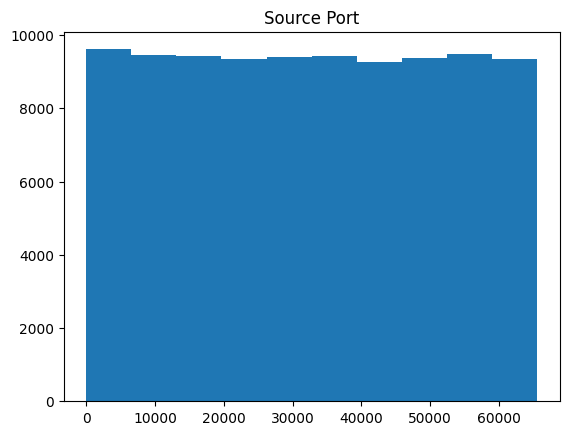

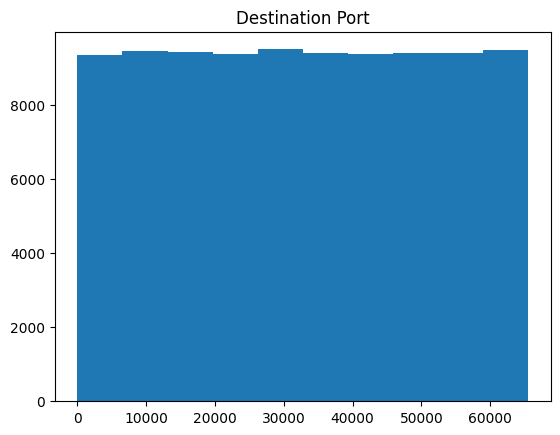

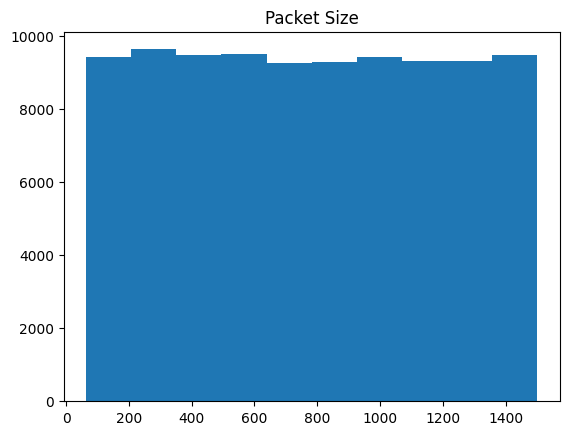

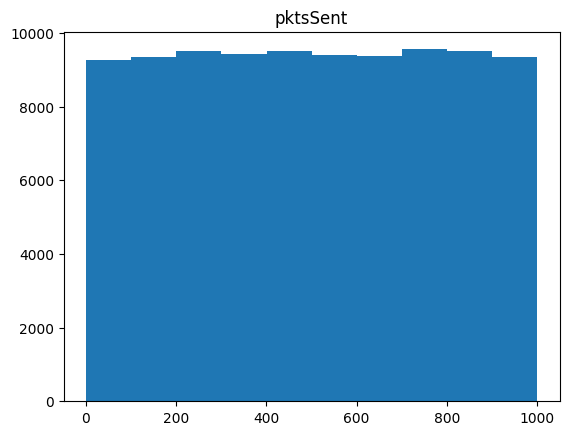

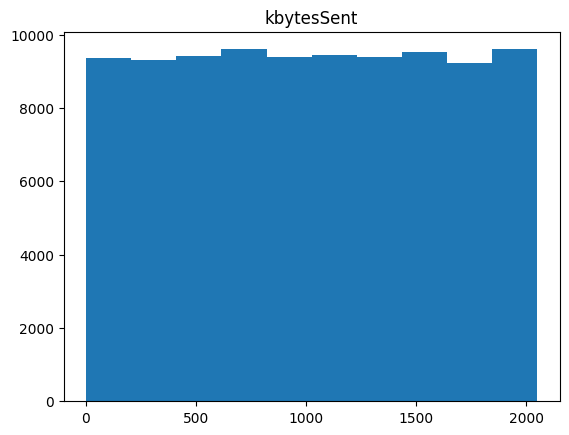

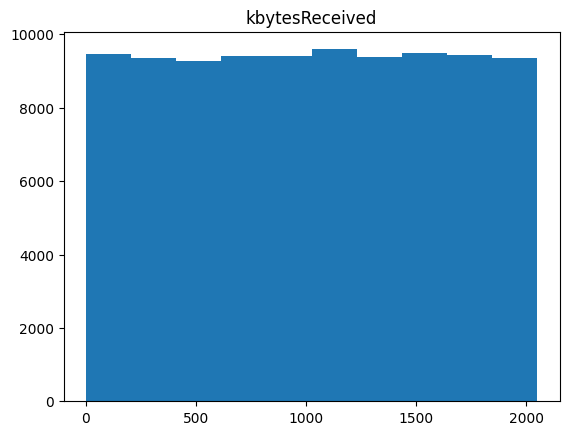

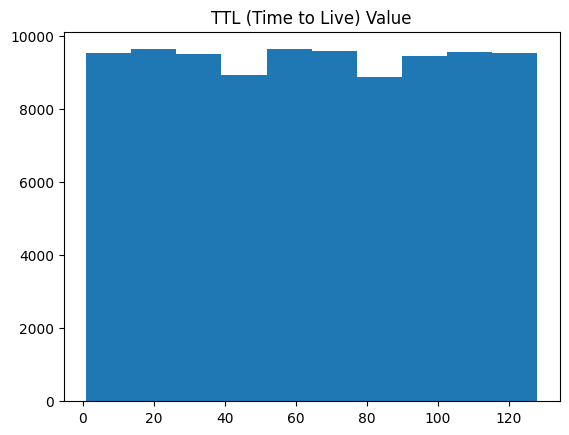

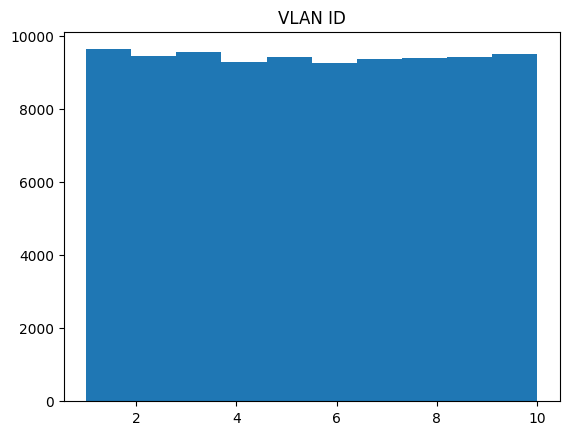

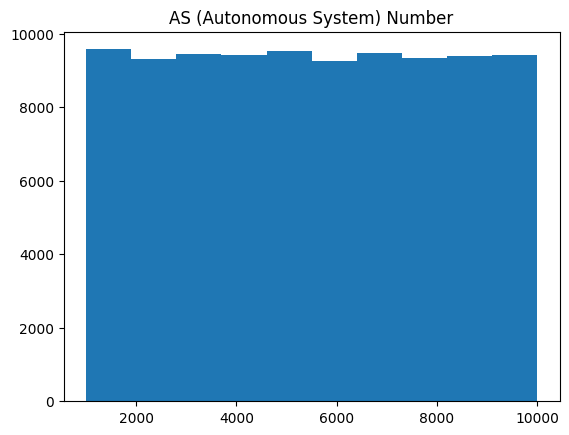

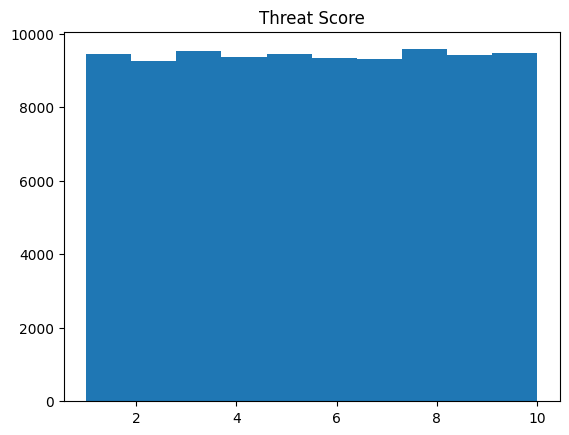

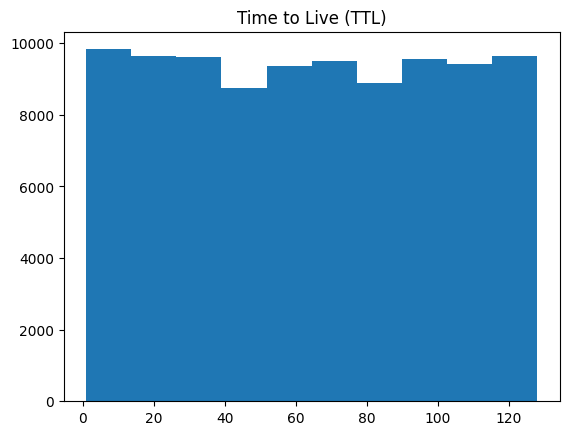

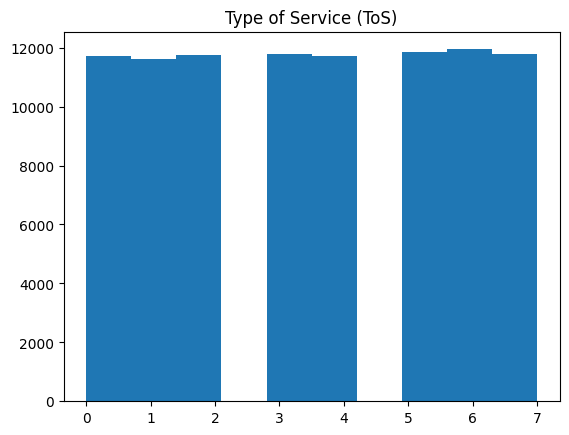

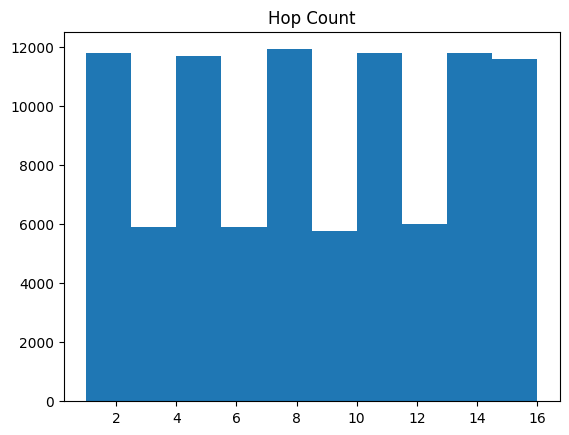

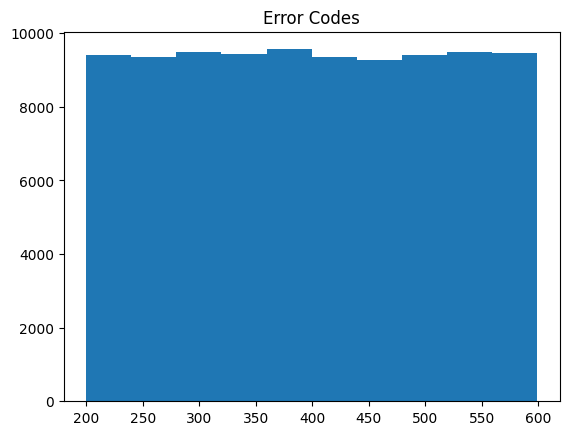

In [24]:
for jeu in num_cols.columns:
    plt.hist(num_cols[jeu])
    plt.title(jeu)
    plt.show()

In [25]:
num_cols.corr()

,Source Port,Destination Port,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,VLAN ID,AS (Autonomous System) Number,Threat Score,Time to Live (TTL),Type of Service (ToS),Hop Count,Error Codes
Source Port,1.000000,0.002343,0.002564,0.004883,0.003763,-0.007799,-0.001072,0.001663,-0.000611,-0.004285,-0.002721,-0.000878,-0.000130,0.004333
Destination Port,0.002343,1.000000,0.000691,0.003877,-0.001283,-0.000083,0.007869,0.002176,-0.000289,0.000987,-0.002663,-0.000729,0.003468,0.002536
Packet Size,0.002564,0.000691,1.000000,-0.004067,0.002093,0.000616,0.001806,0.000967,-0.000049,-0.000099,0.005204,-0.002832,-0.000544,0.006336
pktsSent,0.004883,0.003877,-0.004067,1.000000,0.003129,0.000578,-0.003596,-0.002198,-0.001332,0.000065,0.000683,-0.003142,0.002991,-0.001598
kbytesSent,0.003763,-0.001283,0.002093,0.003129,1.000000,0.002742,-0.007069,0.000434,0.001463,0.001449,-0.004228,0.000338,0.000277,0.002619
kbytesReceived,-0.007799,-0.000083,0.000616,0.000578,0.002742,1.000000,0.001198,-0.000728,0.000307,0.001543,0.002189,0.002420,-0.004387,0.003628
TTL (Time to Live) Value,-0.001072,0.007869,0.001806,-0.003596,-0.007069,0.001198,1.000000,-0.000265,0.001019,-0.000752,0.003807,-0.000703,0.000114,-0.003753
VLAN ID,0.001663,0.002176,0.000967,-0.002198,0.000434,-0.000728,-0.000265,1.000000,0.003922,0.001603,0.000818,-0.000259,-0.000299,0.001686
AS (Autonomous System) Number,-0.000611,-0.000289,-0.000049,-0.001332,0.001463,0.000307,0.001019,0.003922,1.000000,0.003637,0.002385,0.002696,0.002073,0.002665
Threat Score,-0.004285,0.000987,-0.000099,0.000065,0.001449,0.001543,-0.000752,0.001603,0.003637,1.000000,-0.001436,0.002953,-0.000778,-0.000346


<Axes: >

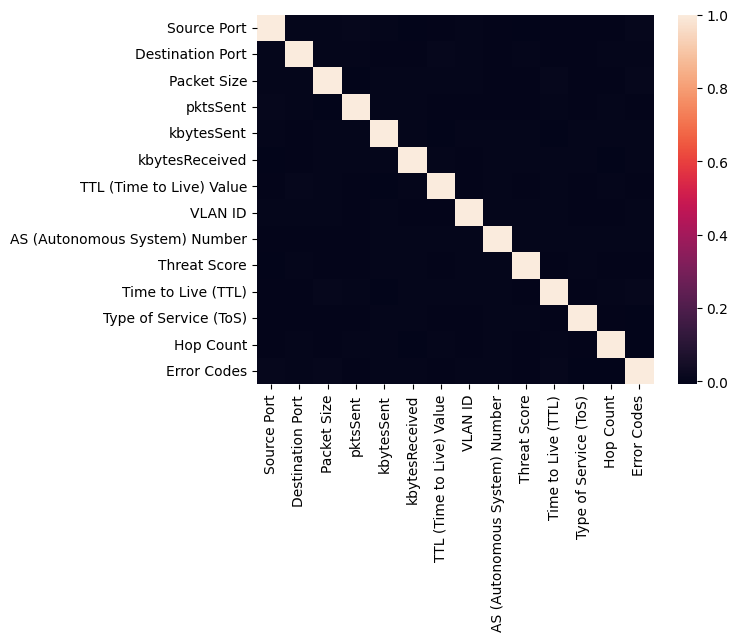

In [26]:
sns.heatmap(num_cols.corr())

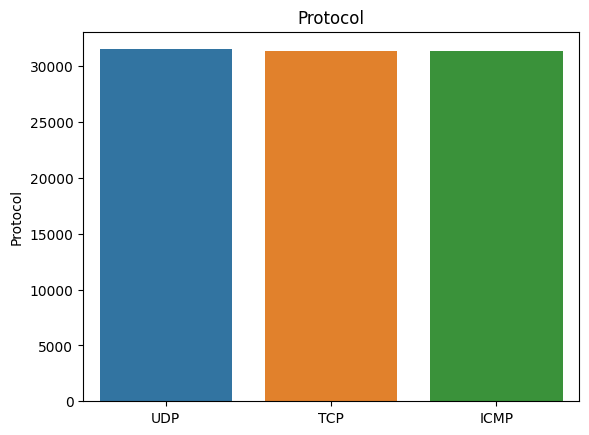

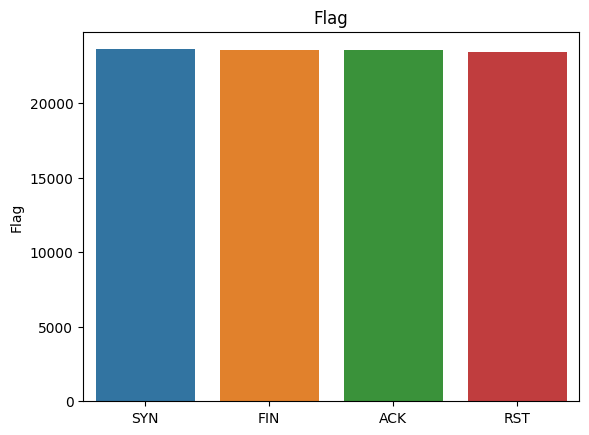

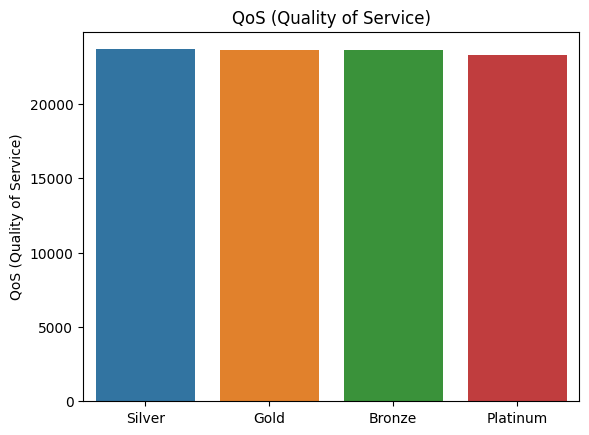

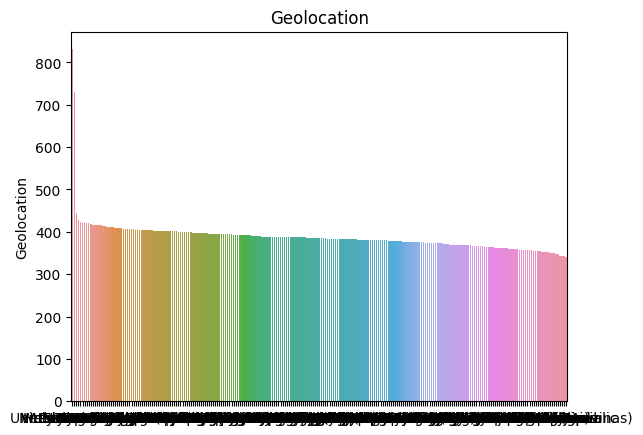

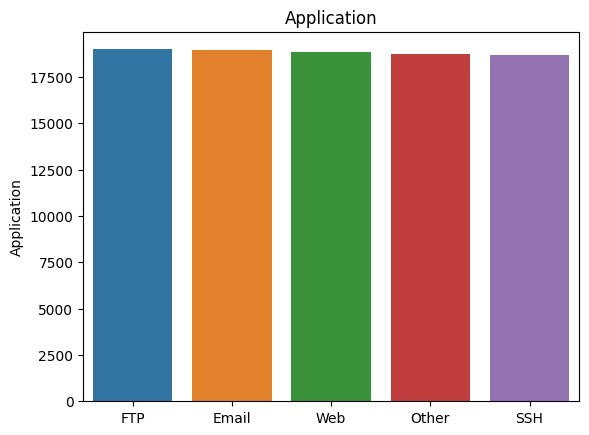

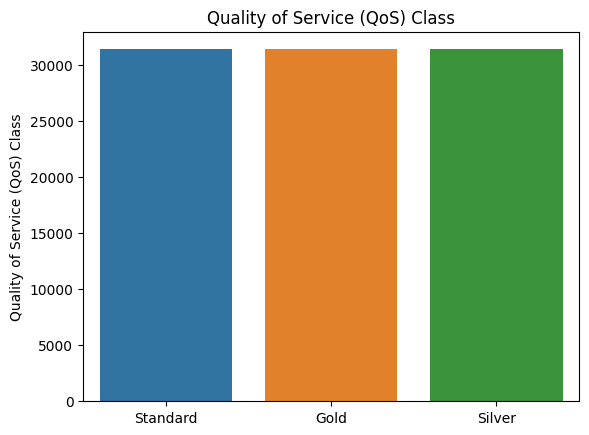

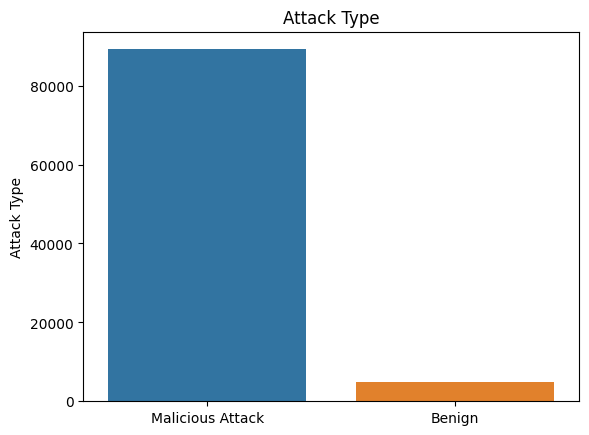

In [27]:
for i in cat_cols.columns:
    sns.barplot(x=cat_cols[i].value_counts().index,y=cat_cols[i].value_counts()).set_title(i)
    plt.show()

From the charts above, we can see that the attack types are imbalanced

In [28]:
data.describe()

,Source Port,Destination Port,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,VLAN ID,AS (Autonomous System) Number,Threat Score,Time to Live (TTL),Type of Service (ToS),Hop Count,Error Codes
count,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000,94200.000000
mean,32681.652739,32785.473312,779.501274,501.791072,1026.240743,1025.474501,64.434565,5.488408,5491.123312,5.507548,64.299650,3.512983,8.491168,399.587633
std,18954.108222,18914.681025,415.360703,287.883713,590.361131,590.371901,36.914171,2.882758,2600.795383,2.875271,37.085122,2.290633,4.601631,115.503851
min,2.000000,2.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000,1.000000,200.000000
25%,16205.000000,16417.000000,418.000000,253.000000,519.000000,515.000000,33.000000,3.000000,3235.000000,3.000000,32.000000,2.000000,5.000000,300.000000
50%,32651.000000,32751.500000,778.000000,501.500000,1026.000000,1028.000000,64.000000,5.000000,5480.500000,6.000000,64.000000,4.000000,8.000000,399.000000
75%,49135.250000,49189.000000,1139.000000,752.000000,1537.000000,1536.000000,96.000000,8.000000,7744.000000,8.000000,96.000000,6.000000,12.000000,500.000000
max,65535.000000,65535.000000,1500.000000,1000.000000,2048.000000,2048.000000,128.000000,10.000000,9999.000000,10.000000,128.000000,7.000000,16.000000,599.000000


In [29]:
data.head()

,Source Port,Destination Port,Protocol,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,Flag,VLAN ID,QoS (Quality of Service),AS (Autonomous System) Number,Geolocation,Application,Threat Score,Time to Live (TTL),Quality of Service (QoS) Class,Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Attack Type
0,28847,32584,TCP,1120,376,1424,1994,110,FIN,7,Gold,1878,China,Web,8,102,Silver,False,4,14,448,Malicious Attack
1,4666,14817,TCP,481,773,588,972,59,ACK,3,Gold,4672,Senegal,FTP,4,58,Standard,True,0,10,529,Malicious Attack
2,44942,59301,UDP,152,294,1834,1895,121,FIN,8,Platinum,4482,Moldova,FTP,7,19,Standard,True,1,13,463,Malicious Attack
3,63574,4929,ICMP,144,904,1507,694,36,ACK,1,Platinum,4519,American Samoa,Other,8,36,Standard,True,1,6,332,Malicious Attack
4,4431,22529,TCP,860,861,1330,867,84,ACK,3,Platinum,2326,Palestinian Territory,SSH,5,73,Standard,True,3,16,478,Malicious Attack


In [30]:
scaler=MinMaxScaler()
data[num_colss]=scaler.fit_transform(data[num_colss])

In [31]:
data.sample(3)

,Source Port,Destination Port,Protocol,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,Flag,VLAN ID,QoS (Quality of Service),AS (Autonomous System) Number,Geolocation,Application,Threat Score,Time to Live (TTL),Quality of Service (QoS) Class,Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Attack Type
19240,0.513970,0.596570,TCP,0.830780,0.407407,0.846116,0.700537,0.677165,ACK,0.666667,Bronze,0.750306,Azerbaijan,Other,0.333333,0.015748,Silver,True,0.857143,0.600000,0.789474,Malicious Attack
9168,0.808661,0.806891,TCP,0.713788,0.869870,0.652662,0.083048,0.937008,SYN,0.222222,Gold,0.991221,Malawi,Other,0.111111,0.102362,Silver,True,0.142857,0.666667,0.563910,Malicious Attack
10068,0.353929,0.019700,TCP,0.316852,0.450450,0.011236,0.280899,0.732283,ACK,0.555556,Bronze,0.412268,Ukraine,SSH,0.444444,0.007874,Standard,False,0.428571,0.533333,0.323308,Malicious Attack


In this section of the code, we  want to convert each countries to their  various continents as a form of feature engineering.
Islands on the Antartica are mapped to countries that own them

In [32]:
data['Geolocation'].nunique()

243

In [33]:
data['Geolocation'].replace({'Palestinian Territory':'Palestine'},inplace=True)
data['Geolocation'].replace({'Pitcairn Islands':'Australia'},inplace=True)
data['Geolocation'].replace({'Holy See (Vatican City State)':'Italy'},inplace=True)
data['Geolocation'].replace({'Western Sahara':'Morocco'},inplace=True)
data['Geolocation'].replace({'Korea':'South Korea'},inplace=True)
data['Geolocation'].replace({'Reunion':'France'},inplace=True)
data['Geolocation'].replace({'Slovakia (Slovak Republic)':'Slovakia'},inplace=True)
data['Geolocation'].replace({'Saint Barthelemy':'Cuba'},inplace=True)
data['Geolocation'].replace({'Timor-Leste':'India'},inplace=True)
data['Geolocation'].replace({'Netherlands Antilles':'Netherlands'},inplace=True)
data['Geolocation'].replace({'British Indian Ocean Territory (Chagos Archipelago)':'Mauritius'},inplace=True)
data['Geolocation'].replace({"Cote d'Ivoire":'Ivory Coast'},inplace=True)
data['Geolocation'].replace({"Svalbard & Jan Mayen Islands":'Norway'},inplace=True)
data['Geolocation'].replace({"United States Minor Outlying Islands":'United States'},inplace=True)
data['Geolocation'].replace({"Libyan Arab Jamahiriya":'Libya'},inplace=True)

In [34]:
data.drop(data[data['Geolocation']=='Antarctica (the territory South of 60 deg S)'].index,axis=0,inplace=True)
data.drop(data[data['Geolocation']=='French Southern Territories'].index,axis=0,inplace=True)
data.drop(data[data['Geolocation']=='Bouvet Island (Bouvetoya)'].index,axis=0,inplace=True)
data.drop(data[data['Geolocation']=='Saint Helena'].index,axis=0,inplace=True)

In [35]:
#Getting the country code
def convert(row):
    cn_code=pc.country_name_to_country_alpha2(row.Geolocation,cn_name_format='default')
    conti_code=pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

In [36]:
data['Continent']=data.apply(convert, axis=1)
data

In [ ]:
data.Continent

In [ ]:
data.isna().sum()

In [ ]:
data['Continent'].value_counts()

In [ ]:
conti_names={
    "AF":"Africa",
    "AS":"Asian",
    "EU": "Europe",
    "NA": "North America",
    "OC": "Oceania",
    "SA": "South America",
    "AN": "Antarctica"
}
data['Continent']=data['Continent'].map(conti_names)
data['Continent'].value_counts()

In [42]:
data.drop(['Geolocation'], axis=1,inplace=True)

In [43]:
data.head()

,Source Port,Destination Port,Protocol,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,Flag,VLAN ID,QoS (Quality of Service),AS (Autonomous System) Number,Application,Threat Score,Time to Live (TTL),Quality of Service (QoS) Class,Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Attack Type,Continent
1,0.071170,0.226069,TCP,0.290390,0.772773,0.286761,0.474353,0.456693,ACK,0.222222,Gold,0.408045,FTP,0.333333,0.448819,Standard,True,0.000000,0.6,0.824561,Malicious Attack,Africa
2,0.685761,0.904872,UDP,0.061281,0.293293,0.895457,0.925256,0.944882,FIN,0.777778,Platinum,0.386932,FTP,0.666667,0.141732,Standard,True,0.142857,0.8,0.659148,Malicious Attack,Europe
4,0.067584,0.343750,TCP,0.554318,0.860861,0.649243,0.423058,0.653543,ACK,0.222222,Platinum,0.147350,SSH,0.444444,0.566929,Standard,True,0.428571,1.0,0.696742,Malicious Attack,Asian
5,0.810233,0.753849,UDP,0.437326,0.327327,0.317538,0.516365,0.850394,FIN,0.888889,Gold,0.542838,Web,0.555556,0.889764,Silver,False,0.142857,0.4,0.107769,Malicious Attack,Oceania
6,0.005463,0.540049,ICMP,0.920613,0.316316,0.638984,0.209575,0.417323,FIN,0.888889,Bronze,0.544394,FTP,1.000000,0.062992,Standard,False,0.857143,1.0,0.744361,Malicious Attack,North America


In [44]:
data['Fragmentation'].replace({False:0,True:1},inplace=True)
data['Attack Type'].replace({'Malicious Attack':0,'Benign':1}, inplace=True)

In [45]:
data['Flag'].nunique()

4

In [46]:
data['Application'].nunique()

5

In [47]:
data=pd.get_dummies(data=data,columns=['Flag','QoS (Quality of Service)','Application','Continent','Quality of Service (QoS) Class','Protocol'])

In [48]:
data.head()

,Source Port,Destination Port,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,VLAN ID,AS (Autonomous System) Number,Threat Score,Time to Live (TTL),Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Attack Type,Flag_ACK,Flag_FIN,Flag_RST,Flag_SYN,QoS (Quality of Service)_Bronze,QoS (Quality of Service)_Gold,QoS (Quality of Service)_Platinum,QoS (Quality of Service)_Silver,Application_Email,Application_FTP,Application_Other,Application_SSH,Application_Web,Continent_Africa,Continent_Antarctica,Continent_Asian,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Quality of Service (QoS) Class_Gold,Quality of Service (QoS) Class_Silver,Quality of Service (QoS) Class_Standard,Protocol_ICMP,Protocol_TCP,Protocol_UDP
1,0.071170,0.226069,0.290390,0.772773,0.286761,0.474353,0.456693,0.222222,0.408045,0.333333,0.448819,1,0.000000,0.6,0.824561,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0.685761,0.904872,0.061281,0.293293,0.895457,0.925256,0.944882,0.777778,0.386932,0.666667,0.141732,1,0.142857,0.8,0.659148,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0.067584,0.343750,0.554318,0.860861,0.649243,0.423058,0.653543,0.222222,0.147350,0.444444,0.566929,1,0.428571,1.0,0.696742,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
5,0.810233,0.753849,0.437326,0.327327,0.317538,0.516365,0.850394,0.888889,0.542838,0.555556,0.889764,0,0.142857,0.4,0.107769,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
6,0.005463,0.540049,0.920613,0.316316,0.638984,0.209575,0.417323,0.888889,0.544394,1.000000,0.062992,0,0.857143,1.0,0.744361,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [49]:
data.shape

(87538, 42)

In [50]:
data.dtypes

Source Port                                float64
Destination Port                           float64
Packet Size                                float64
pktsSent                                   float64
kbytesSent                                 float64
kbytesReceived                             float64
TTL (Time to Live) Value                   float64
VLAN ID                                    float64
AS (Autonomous System) Number              float64
Threat Score                               float64
Time to Live (TTL)                         float64
Fragmentation                                int64
Type of Service (ToS)                      float64
Hop Count                                  float64
Error Codes                                float64
Attack Type                                  int64
Flag_ACK                                     uint8
Flag_FIN                                     uint8
Flag_RST                                     uint8
Flag_SYN                       

#Majority Undersampling as a form of handling imbalanced dataset

In [51]:
data_count_0=data[data['Attack Type']==0]
data_count_1=data[data['Attack Type']==1]

In [52]:
count_class_0,count_class_1=data['Attack Type'].value_counts()
count_class_0,count_class_1

(82904, 4634)

In [53]:
data_count_0.shape,data_count_1.shape

((82904, 42), (4634, 42))

In [54]:
data_under_sample0 = data_count_0.sample(count_class_1)

data_under=pd.concat([data_under_sample0,data_count_1])

In [55]:
data_under['Attack Type'].value_counts()

0    4634
1    4634
Name: Attack Type, dtype: int64

In [56]:
x=data_under.drop('Attack Type',axis=1)
y=data_under['Attack Type']

In [57]:
x.head()

,Source Port,Destination Port,Packet Size,pktsSent,kbytesSent,kbytesReceived,TTL (Time to Live) Value,VLAN ID,AS (Autonomous System) Number,Threat Score,Time to Live (TTL),Fragmentation,Type of Service (ToS),Hop Count,Error Codes,Flag_ACK,Flag_FIN,Flag_RST,Flag_SYN,QoS (Quality of Service)_Bronze,QoS (Quality of Service)_Gold,QoS (Quality of Service)_Platinum,QoS (Quality of Service)_Silver,Application_Email,Application_FTP,Application_Other,Application_SSH,Application_Web,Continent_Africa,Continent_Antarctica,Continent_Asian,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Quality of Service (QoS) Class_Gold,Quality of Service (QoS) Class_Silver,Quality of Service (QoS) Class_Standard,Protocol_ICMP,Protocol_TCP,Protocol_UDP
11187,0.514336,0.823265,0.089833,0.874875,0.054226,0.271128,0.992126,0.777778,0.784865,0.333333,0.755906,0,0.714286,0.533333,0.979950,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2581,0.101399,0.813773,0.038301,0.810811,0.987787,0.844651,0.110236,0.222222,0.690743,0.111111,0.141732,1,0.285714,0.733333,0.170426,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1089,0.591183,0.302504,0.288301,0.401401,0.714704,0.812408,0.188976,0.666667,0.458384,0.666667,0.385827,0,0.714286,0.200000,0.350877,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
16141,0.555873,0.930920,0.096797,0.664665,0.710308,0.507572,0.976378,0.777778,0.648850,1.000000,0.559055,0,0.285714,0.800000,0.558897,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2557,0.602246,0.398456,0.700557,0.468468,0.008793,0.829995,0.188976,0.000000,0.833093,0.777778,0.905512,0,0.285714,0.200000,0.328321,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [58]:
y.head()

11187    0
2581     0
1089     0
16141    0
2557     0
Name: Attack Type, dtype: int64

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

#Logistic Regression Undersampling

In [60]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
model.score(x_test,y_test)

0.4924487594390507

In [62]:
y_pred=model.predict(x_test)

In [63]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[455, 472],
       [469, 458]])

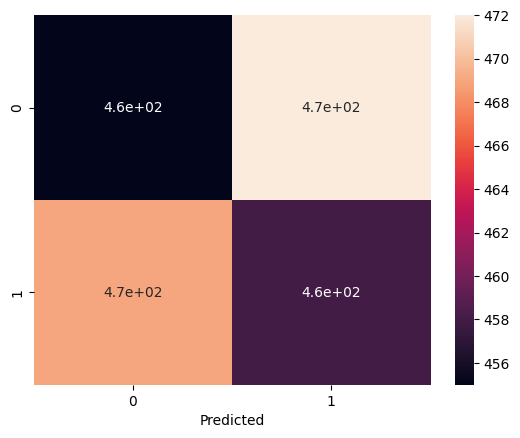

In [64]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel=('True')

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       927
           1       0.49      0.49      0.49       927

    accuracy                           0.49      1854
   macro avg       0.49      0.49      0.49      1854
weighted avg       0.49      0.49      0.49      1854



#Decision Tree Undersampling

In [66]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
model.score(x_test,y_test)

0.5102481121898598

In [68]:
y_pred=model.predict(x_test)

In [69]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[487, 440],
       [468, 459]])

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       927
           1       0.51      0.50      0.50       927

    accuracy                           0.51      1854
   macro avg       0.51      0.51      0.51      1854
weighted avg       0.51      0.51      0.51      1854



#Random Forest Undersampling

In [71]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
model.score(x_test,y_test)

0.49083063646170444

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       927
           1       0.51      0.50      0.50       927

    accuracy                           0.51      1854
   macro avg       0.51      0.51      0.51      1854
weighted avg       0.51      0.51      0.51      1854



#XGB Classifier Undersampling

In [74]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
model.score(x_test,y_test)

0.5194174757281553

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       927
           1       0.51      0.50      0.50       927

    accuracy                           0.51      1854
   macro avg       0.51      0.51      0.51      1854
weighted avg       0.51      0.51      0.51      1854



#Using Deep Learning. Artifical Neural Network Undersampling

In [77]:
from keras.engine.training import optimizer
from keras.api._v2.keras import activations
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(41,input_shape=(41,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
232/232 [==============================] - 2s 2ms/step - loss: 0.6958 - accuracy: 0.4968
Epoch 2/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5109
Epoch 3/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5209
Epoch 4/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5301
Epoch 5/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5329
Epoch 6/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5464
Epoch 7/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6858 - accuracy: 0.5503
Epoch 8/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5499
Epoch 9/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5598
Epoch 10/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6784 - accura

In [78]:
model.evaluate(x_test,y_test)

58/58 [==============================] - 0s 2ms/step - loss: 0.9767 - accuracy: 0.5092


[0.9767211079597473, 0.509169340133667]

In [79]:
y_pred=model.predict(x_test)

58/58 [==============================] - 0s 1ms/step


In [80]:
y_pred[:5]

array([[0.47612187],
       [0.57068855],
       [0.32112825],
       [0.6958266 ],
       [0.25755513]], dtype=float32)

In [81]:
yp=[]
for i in y_pred:
  if i > 0.5:
    yp.append(1)
  else:
    yp.append(0)

In [82]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53       927
           1       0.51      0.46      0.48       927

    accuracy                           0.51      1854
   macro avg       0.51      0.51      0.51      1854
weighted avg       0.51      0.51      0.51      1854



In [83]:
print(confusion_matrix(y_test,yp))

[[519 408]
 [502 425]]


# Minority Oversampling

In [84]:
data_count_0=data[data['Attack Type']==0]
data_count_1=data[data['Attack Type']==1]

In [85]:
count_class_0,count_class_1=data['Attack Type'].value_counts()
count_class_0,count_class_1

(82904, 4634)

In [86]:
data_over=data_count_1.sample(count_class_0, replace=True)

data_over_1=pd.concat([data_count_0,data_over],axis=0)
data_over_1['Attack Type'].value_counts()

0    82904
1    82904
Name: Attack Type, dtype: int64

In [87]:
x=data_over_1.drop('Attack Type',axis=1)
y=data_over_1['Attack Type']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

#Logistic Regression Oversampling

In [89]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [90]:
model.score(x_test,y_test)

0.5099813039020565

In [91]:
y_pred=model.predict(x_test)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50     16581
           1       0.51      0.52      0.52     16581

    accuracy                           0.51     33162
   macro avg       0.51      0.51      0.51     33162
weighted avg       0.51      0.51      0.51     33162



#Decision Tree Oversampling

In [93]:
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
model.score(x_train,y_train)

1.0

In [95]:
model.score(x_test,y_test)

0.9672818285989988

In [96]:
y_pred=model.predict(x_test)
y_pred[:5]

array([1, 0, 1, 1, 0])

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     16581
           1       0.94      1.00      0.97     16581

    accuracy                           0.97     33162
   macro avg       0.97      0.97      0.97     33162
weighted avg       0.97      0.97      0.97     33162



#Random Forest Oversampling

In [98]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
model.score(x_train,y_train)

1.0

In [100]:
model.score(x_test,y_test)

1.0

In [101]:
y_pred=model.predict(x_test)

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16581
           1       1.00      1.00      1.00     16581

    accuracy                           1.00     33162
   macro avg       1.00      1.00      1.00     33162
weighted avg       1.00      1.00      1.00     33162



#XGB Classifier Oversampling


In [103]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
model.score(x_test,y_test)

0.8610156202882817

In [105]:
y_pred=model.predict(x_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85     16581
           1       0.83      0.91      0.87     16581

    accuracy                           0.86     33162
   macro avg       0.87      0.86      0.86     33162
weighted avg       0.87      0.86      0.86     33162



#Artificial Neural network Oversampling

In [107]:
model=keras.Sequential([
    keras.layers.Dense(41,input_shape=(41,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
4146/4146 [==============================] - 10s 2ms/step - loss: 0.6895 - accuracy: 0.5307
Epoch 2/100
4146/4146 [==============================] - 9s 2ms/step - loss: 0.6744 - accuracy: 0.5759
Epoch 3/100
4146/4146 [==============================] - 9s 2ms/step - loss: 0.6571 - accuracy: 0.6059
Epoch 4/100
4146/4146 [==============================] - 8s 2ms/step - loss: 0.6435 - accuracy: 0.6245
Epoch 5/100
4146/4146 [==============================] - 9s 2ms/step - loss: 0.6321 - accuracy: 0.6390
Epoch 6/100
4146/4146 [==============================] - 9s 2ms/step - loss: 0.6233 - accuracy: 0.6484
Epoch 7/100
4146/4146 [==============================] - 8s 2ms/step - loss: 0.6165 - accuracy: 0.6563
Epoch 8/100
4146/4146 [==============================] - 9s 2ms/step - loss: 0.6105 - accuracy: 0.6612
Epoch 9/100
4146/4146 [==============================] - 9s 2ms/step - loss: 0.6051 - accuracy: 0.6666
Epoch 10/100
4146/4146 [==============================] - 9s 2ms/step - 

In [108]:
model.evaluate(x_test,y_test)

1037/1037 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.7004


[0.5576631426811218, 0.7004402875900269]

In [109]:
y_pred=model.predict(x_test)

1037/1037 [==============================] - 2s 2ms/step


In [ ]:
yp=[]
for i in y_pred:
  if i > 0.5:
    yp.append(1)
  else:
    yp.append(0)

In [111]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66     16581
           1       0.66      0.82      0.73     16581

    accuracy                           0.70     33162
   macro avg       0.71      0.70      0.70     33162
weighted avg       0.71      0.70      0.70     33162

              precision    recall  f1-score   support

           0       0.76      0.58      0.66     16581
           1       0.66      0.82      0.73     16581

    accuracy                           0.70     33162
   macro avg       0.71      0.70      0.70     33162
weighted avg       0.71      0.70      0.70     33162



From our models, we can see that RandomForest has the highest accuracy followed by DecisionTree Classifier. 

Also, we could see that, minority oversampling as a method of handling imbalanced dataset performed better than the majority undersampling, this could be cos when undersampling, the dataset lost more data for training ability.